<a href="https://colab.research.google.com/github/shashi545/shashidhar/blob/master/DL_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading the libraries**

In [0]:
from google.colab import drive

In [0]:
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
os.chdir('/drive/My Drive')

# **LOAD THE TRAIN DATA**



In [0]:
df=pd.read_csv('hackathon_images_train.csv')

In [0]:
df.head()

,Labels,pixels0,pixels1,pixels2,pixels3,pixels4,pixels5,pixels6,pixels7,pixels8,pixels9,pixels10,pixels11,pixels12,pixels13,pixels14,pixels15,pixels16,pixels17,pixels18,pixels19,pixels20,pixels21,pixels22,pixels23,pixels24,pixels25,pixels26,pixels27,pixels28,pixels29,pixels30,pixels31,pixels32,pixels33,pixels34,pixels35,pixels36,pixels37,pixels38,...,pixels9960,pixels9961,pixels9962,pixels9963,pixels9964,pixels9965,pixels9966,pixels9967,pixels9968,pixels9969,pixels9970,pixels9971,pixels9972,pixels9973,pixels9974,pixels9975,pixels9976,pixels9977,pixels9978,pixels9979,pixels9980,pixels9981,pixels9982,pixels9983,pixels9984,pixels9985,pixels9986,pixels9987,pixels9988,pixels9989,pixels9990,pixels9991,pixels9992,pixels9993,pixels9994,pixels9995,pixels9996,pixels9997,pixels9998,pixels9999
0,Faces_easy,84.0,83.0,82.0,80.0,77.0,76.0,71.0,71.0,72.0,73.0,73.0,65.0,65.0,62.0,63.0,68.0,65.0,65.0,72.0,77.0,86.0,85.0,88.0,84.0,87.0,82.0,79.0,62.0,80.0,80.0,83.0,84.0,82.0,87.0,91.0,87.0,85.0,85.0,89.0,...,189.0,185.0,193.0,194.0,195.0,197.0,194.0,190.0,188.0,185.0,184.0,186.0,186.0,185.0,187.0,188.0,184.0,187.0,183.0,184.0,188.0,192.0,193.0,202.0,206.0,207.0,203.0,228.0,226.0,226.0,225.0,213.0,221.0,220.0,219.0,221.0,222.0,222.0,222.0,223.0
1,airplanes,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,198.0,197.0,197.0,195.0,195.0,195.0,195.0,196.0,196.0,195.0,195.0,195.0,195.0,195.0,196.0,196.0,195.0,194.0,195.0,195.0,195.0,196.0,197.0,196.0,195.0,197.0,198.0,198.0,...,179.0,174.0,192.0,154.0,171.0,200.0,186.0,194.0,206.0,209.0,211.0,168.0,181.0,205.0,186.0,200.0,175.0,175.0,171.0,204.0,208.0,179.0,179.0,180.0,189.0,163.0,173.0,196.0,190.0,178.0,179.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,Motorbikes,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,15.0,16.0,19.0,17.0,16.0,16.0,18.0,12.0,25.0,20.0,17.0,20.0,18.0,16.0,51.0,28.0,23.0,12.0,16.0,57.0,22.0,16.0,10.0,17.0,20.0,25.0,26.0,223.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,Leopards,2.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,6.0,2.0,3.0,0.0,2.0,2.0,...,18.0,24.0,24.0,19.0,24.0,15.0,20.0,16.0,22.0,16.0,25.0,18.0,20.0,25.0,26.0,21.0,22.0,20.0,23.0,18.0,20.0,21.0,17.0,22.0,16.0,22.0,12.0,14.0,19.0,18.0,17.0,18.0,13.0,17.0,19.0,14.0,20.0,11.0,2.0,5.0
4,Faces,125.0,123.0,123.0,120.0,120.0,116.0,114.0,114.0,115.0,99.0,63.0,183.0,185.0,188.0,191.0,197.0,199.0,193.0,195.0,203.0,202.0,205.0,208.0,210.0,209.0,209.0,210.0,217.0,217.0,218.0,217.0,220.0,221.0,219.0,214.0,213.0,209.0,218.0,223.0,...,193.0,190.0,192.0,195.0,185.0,189.0,187.0,171.0,187.0,187.0,196.0,187.0,186.0,173.0,183.0,183.0,172.0,180.0,181.0,175.0,173.0,172.0,169.0,166.0,164.0,152.0,140.0,135.0,84.0,86.0,104.0,123.0,123.0,102.0,139.0,116.0,100.0,112.0,118.0,139.0


In [0]:
X=df.iloc[:,1:].values
Y=df.iloc[:,0].values.reshape(-1,1)
X.shape,Y.shape

((1671, 10000), (1671, 1))

## **Image preprocessing**

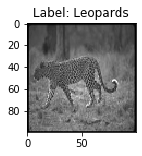

In [0]:
def visualize_img(i):
    img = X[i:i+1] # flatten Image for 3rd row(2nd index)image to 4th row (but n-1 row)so only 3rd row image
    img = img.reshape(100,100) # reshaped Image
    plt.figure(figsize=(2,2))
    plt.imshow(img,cmap='gray')
    plt.title('Label: {}'.format(y[i][0]))

visualize_img(3) # 3rd row image


In [0]:
X_norm = X/X.max() # min max scalling

# onehot enconding of y
from sklearn.preprocessing import OneHotEncoder # like dummies
ohe = OneHotEncoder()
y_hot = ohe.fit_transform(y).toarray()
y_hot

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_norm,y_hot,test_size=0.2)
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((1336, 10000), (335, 10000), (1336, 8), (335, 8))

## **CNN**


In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten

In [0]:
x_train_reshape = x_train.reshape(-1,100,100,1)
x_test_reshape = x_test.reshape(-1,100,100,1)

x_train_reshape.shape,x_test_reshape.shape

((1336, 100, 100, 1), (335, 100, 100, 1))

In [0]:
def conv_neural_network():
    model=Sequential()
    # Convolutional layer
    model.add(Conv2D(input_shape=(100,100,1),filters=30,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(Conv2D(filters=60,kernel_size=(5,5),strides=(1,1),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(filters=30,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    # Flatten
    model.add(Flatten())
    # Neural network
    model.add(Dense(units=100,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))# input connected to output
    model.add(Dense(units=100,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Dense(units=8,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    return model

# calling baseline model
conv_nn = conv_neural_network()
print(conv_nn.summary())
# initializing tensorboard
tfb = TensorBoard('image')
# Training Model 
history = conv_nn.fit(x=x_train_reshape,y=y_train,batch_size=30,epochs=20,callbacks=[tfb],validation_data=[x_test_reshape,y_test])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 30)        300       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 94, 94, 60)        45060     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 47, 47, 60)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 30)        16230     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 30)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 14520)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)              

In [0]:
data_loss_nn = pd.DataFrame(history.history)
data_loss_nn.head(3)

,loss,acc,val_loss,val_acc
0,2.715196,0.470808,1.580066,0.689552
1,1.177330,0.834581,1.080720,0.844776
2,0.879534,0.878743,0.821919,0.907463


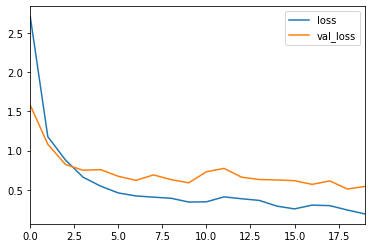

In [0]:
data_loss_nn[['loss','val_loss']].plot(kind='line')

In [0]:
y_pred = conv_nn.predict_classes(x_test_reshape)
y_prob = conv_nn.predict_proba(x_test_reshape)

In [0]:
from sklearn import metrics

In [0]:
y_test_class = ohe.inverse_transform(y_test)

In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss

def classification_metric(y_test,y_pred,y_prob,label,n=1,verbose=False):
    """
    Note: only for binary classification
    confusionmatrix(y_true,y_pred,labels=['No','Yes'])
    """
    # confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    row_sum = cm.sum(axis=0)
    cm = np.append(cm,row_sum.reshape(1,-1),axis=0)
    col_sum = cm.sum(axis=1)
    cm = np.append(cm,col_sum.reshape(-1,1),axis=1)

    labels = label+['Total']
    plt.figure(figsize=(10,6))
    sns.heatmap(cm,annot=True,cmap='summer',fmt='0.2f',xticklabels=labels,
                yticklabels=labels,linewidths=3,cbar=None,)

    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('*'*30+'Classifcation Report'+'*'*30+'\n\n')
    cr = classification_report(y_test,y_pred)
    print(cr)
    
    print('\n'+'*'*36+'Kappa Score'+'*'*36+'\n\n')
    # Kappa score
    kappa = cohen_kappa_score(y_test,y_pred) # Kappa Score
    print('Kappa Score =',kappa)
    
    
    
    
class threshold():
    '''
    Setting up the threshold points
    '''
    def __init__(self):
        self.th = 0.5
        
    def predict_threshold(self,y):
        if y >= self.th:
            return 1
        else:
            return 0

In [0]:
y_test_class = ohe.inverse_transform(y_test)

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
yy=ohe.inverse_transform(y_test)
y_label=LabelEncoder()
y_pp=y_label.fit_transform(yy)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


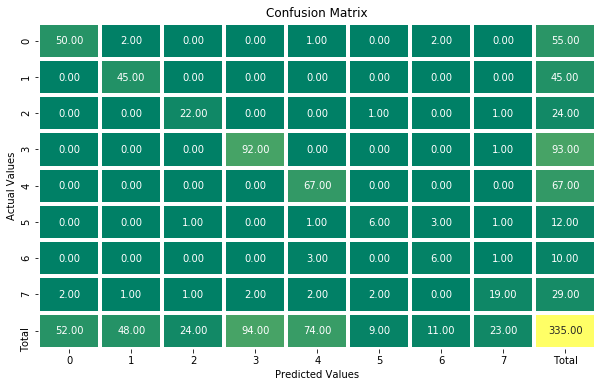

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.96      0.91      0.93        55
           1       0.94      1.00      0.97        45
           2       0.92      0.92      0.92        24
           3       0.98      0.99      0.98        93
           4       0.91      1.00      0.95        67
           5       0.67      0.50      0.57        12
           6       0.55      0.60      0.57        10
           7       0.83      0.66      0.73        29

    accuracy                           0.92       335
   macro avg       0.84      0.82      0.83       335
weighted avg       0.91      0.92      0.91       335


************************************Kappa Score************************************


Kappa Score = 0.8980922167658946


In [0]:
classification_metric(y_pp,y_pred,y_prob,label=[0,1,2,3,4,5,6,7])

# **Testing using trained model** 

In [0]:
df2=pd.read_csv('hackathon_images_test.csv')

In [0]:
df2.head()

,Labels,pixels0,pixels1,pixels2,pixels3,pixels4,pixels5,pixels6,pixels7,pixels8,pixels9,pixels10,pixels11,pixels12,pixels13,pixels14,pixels15,pixels16,pixels17,pixels18,pixels19,pixels20,pixels21,pixels22,pixels23,pixels24,pixels25,pixels26,pixels27,pixels28,pixels29,pixels30,pixels31,pixels32,pixels33,pixels34,pixels35,pixels36,pixels37,pixels38,...,pixels9960,pixels9961,pixels9962,pixels9963,pixels9964,pixels9965,pixels9966,pixels9967,pixels9968,pixels9969,pixels9970,pixels9971,pixels9972,pixels9973,pixels9974,pixels9975,pixels9976,pixels9977,pixels9978,pixels9979,pixels9980,pixels9981,pixels9982,pixels9983,pixels9984,pixels9985,pixels9986,pixels9987,pixels9988,pixels9989,pixels9990,pixels9991,pixels9992,pixels9993,pixels9994,pixels9995,pixels9996,pixels9997,pixels9998,pixels9999
0,Leopards,2.0,4.0,2.0,0.0,3.0,3.0,5.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,4.0,2.0,2.0,3.0,6.0,0.0,5.0,1.0,5.0
1,bonsai,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,116.0,192.0,223.0,161.0,143.0,135.0,70.0,195.0,153.0,146.0,171.0,242.0,81.0,161.0,89.0,150.0,201.0,242.0,93.0,153.0,156.0,124.0,246.0,136.0,205.0,252.0,251.0,251.0,253.0,253.0,253.0,254.0,255.0,255.0,255.0,254.0,255.0,255.0,255.0,141.0
2,Faces_easy,153.0,152.0,153.0,154.0,155.0,153.0,159.0,160.0,157.0,157.0,157.0,157.0,157.0,157.0,158.0,159.0,158.0,163.0,160.0,160.0,162.0,161.0,162.0,159.0,161.0,162.0,164.0,164.0,163.0,159.0,161.0,164.0,166.0,167.0,162.0,162.0,162.0,165.0,164.0,...,215.0,213.0,207.0,210.0,110.0,78.0,85.0,86.0,78.0,82.0,83.0,88.0,75.0,66.0,62.0,61.0,70.0,71.0,87.0,78.0,77.0,74.0,61.0,62.0,67.0,67.0,65.0,69.0,74.0,71.0,73.0,69.0,69.0,80.0,78.0,76.0,75.0,75.0,73.0,72.0
3,Motorbikes,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,Motorbikes,255.0,255.0,255.0,255.0,255.0,255.0,254.0,255.0,254.0,207.0,208.0,212.0,211.0,211.0,211.0,212.0,213.0,214.0,213.0,213.0,213.0,213.0,216.0,216.0,215.0,215.0,215.0,216.0,216.0,216.0,218.0,217.0,216.0,216.0,219.0,219.0,217.0,219.0,218.0,...,39.0,41.0,44.0,45.0,45.0,50.0,51.0,53.0,53.0,54.0,57.0,57.0,59.0,62.0,64.0,63.0,65.0,67.0,67.0,67.0,70.0,75.0,77.0,80.0,79.0,79.0,84.0,81.0,83.0,84.0,86.0,87.0,86.0,85.0,88.0,92.0,254.0,255.0,255.0,255.0


In [0]:
X1.shape

(1118, 100, 100, 1)

In [0]:
y_pp1=y_label.transform(df2['Labels'])

In [0]:
y_pred = conv_nn.predict_classes(X1)
y_prob = conv_nn.predict_proba(X1)

In [0]:
y_label.classes_

array(['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'airplanes',
       'bonsai', 'grand_piano', 'watch'], dtype=object)

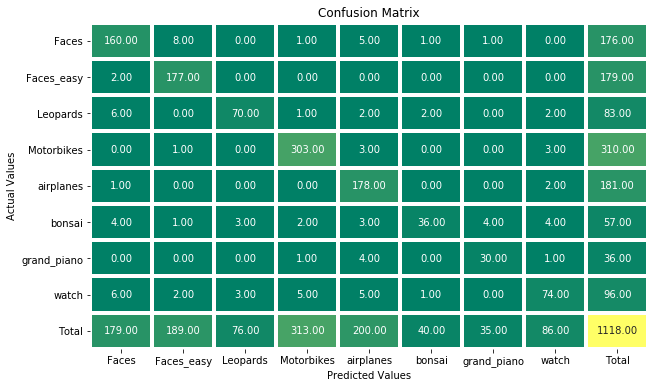

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.89      0.91      0.90       176
           1       0.94      0.99      0.96       179
           2       0.92      0.84      0.88        83
           3       0.97      0.98      0.97       310
           4       0.89      0.98      0.93       181
           5       0.90      0.63      0.74        57
           6       0.86      0.83      0.85        36
           7       0.86      0.77      0.81        96

    accuracy                           0.92      1118
   macro avg       0.90      0.87      0.88      1118
weighted avg       0.92      0.92      0.92      1118


************************************Kappa Score************************************


Kappa Score = 0.9026184242999066


In [0]:
classification_metric(y_pp1,y_pred,y_prob,label=['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'airplanes','bonsai', 'grand_piano', 'watch'])